In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
%matplotlib inline
Data = pd.read_csv('/content/review_problem3.csv')

Data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


EDA : Drop duplicate and drop null

In [34]:
dup = Data[Data.duplicated(subset=['UserId','ProfileName','Time','Text'],keep=False)]
dup.shape

(42, 10)

In [35]:
data = Data.drop_duplicates(subset=['UserId','ProfileName','Time','Text'],keep='first',inplace=False)
data.shape

(6229, 10)

Analyisis of Reviews over time

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


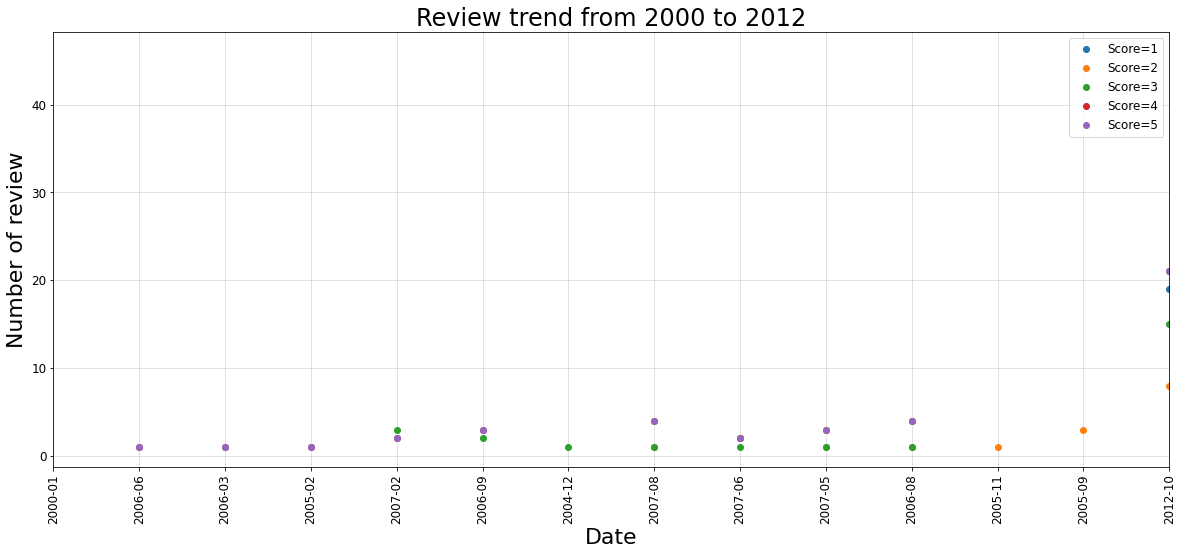

In [46]:
data['date'] = pd.to_datetime(data['Time'],unit='s')
dataf = data[['date','Text','Score']]
dataf.date = data.date.dt.strftime('%Y-%m')
# dataf['date'] = dataf['date'].dt.to_timestamp()
dataf = dataf.sort_values(by=['date']).reset_index(drop=True)
dataf_1 = dataf[dataf['Score'] == 1]
dataf_2 = dataf[dataf['Score'] == 2]
dataf_3 = dataf[dataf['Score'] == 3]
dataf_4 = dataf[dataf['Score'] == 4]
dataf_5 = dataf[dataf['Score'] == 5]

dataf_1 = dataf_1.groupby('date')['Score'].count().reset_index()
dataf_2 = dataf_2.groupby('date')['Score'].count().reset_index()
dataf_3 = dataf_3.groupby('date')['Score'].count().reset_index()
dataf_5 = dataf_4.groupby('date')['Score'].count().reset_index()
dataf_4 = dataf_4.groupby('date')['Score'].count().reset_index()

plt.figure(figsize=(20,8))

plt.plot_date(x=dataf_1['date'],y=dataf_1['Score'],label='Score=1')
plt.plot_date(x=dataf_2['date'],y=dataf_2['Score'],label='Score=2')
plt.plot_date(x=dataf_3['date'],y=dataf_3['Score'],label='Score=3')
plt.plot_date(x=dataf_4['date'],y=dataf_4['Score'],label='Score=4')
plt.plot_date(x=dataf_5['date'],y=dataf_5['Score'],label='Score=5')
plt.grid(linewidth=0.5,alpha=0.75)
plt.xticks(rotation=90)
plt.xlim('2000-01','2012-10')
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Review trend from 2000 to 2012',fontsize=24);
plt.savefig('review_trend.png')
plt.legend()
plt.show()

In [47]:
purchases = data[['ProductId','UserId']].groupby('UserId').agg({'ProductId': ['count']})
purchases.columns = ['No_of_products_purchased']
purchases = purchases.reset_index()
purchases.head(2)

,UserId,No_of_products_purchased
0,A10012K7DF3SBQ,1
1,A1001TYW5FZYD9,1


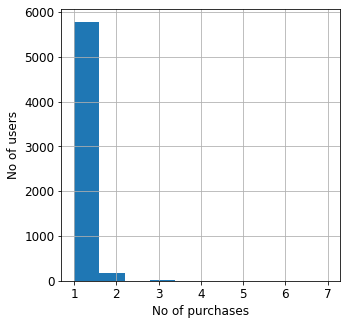

count    5986.000000
mean        1.044270
std         0.270915
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: No_of_products_purchased, dtype: float64


In [48]:
plt.figure(figsize=(5,5))
purchases['No_of_products_purchased'].hist()
plt.xlabel('No of purchases')
plt.ylabel('No of users')
plt.show()
print(purchases['No_of_products_purchased'].describe())

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

In [36]:
Data.shape

(6251, 10)

In [37]:
Data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,6251.000000,6251.000000,6251.000000,6251.000000,6.251000e+03
mean,3126.000000,1.593505,2.068629,4.176772,1.295259e+09
std,1804.652598,5.416007,6.080415,1.318524,4.768407e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1563.500000,0.000000,0.000000,4.000000,1.271678e+09
50%,3126.000000,0.000000,1.000000,5.000000,1.309651e+09
75%,4688.500000,2.000000,2.000000,5.000000,1.330560e+09
max,6251.000000,187.000000,216.000000,5.000000,1.351210e+09


In [38]:
data = Data.dropna()

In [39]:
data.shape

(6251, 10)

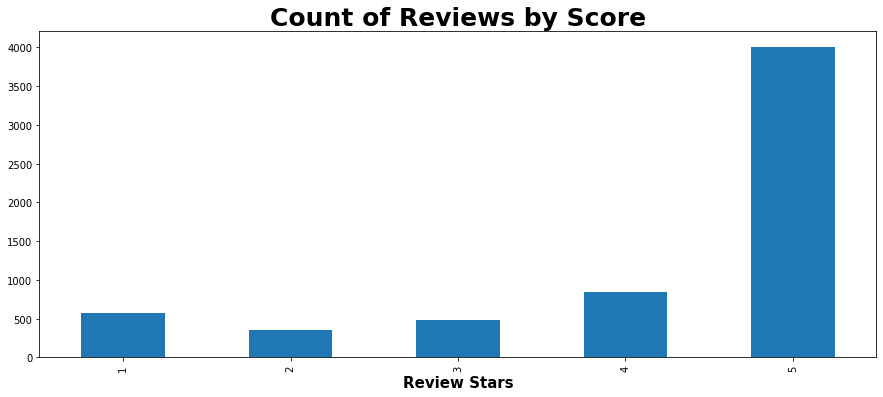

In [40]:
ax = data['Score'].value_counts().sort_index() .plot(kind='bar',figsize=(15, 6))
ax.set_xlabel('Review Stars',fontsize=15,fontweight='bold')
ax.set_title('Count of Reviews by Score',fontsize=25,fontweight='bold')
plt.show()

Sentiment Analysis :
The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy 

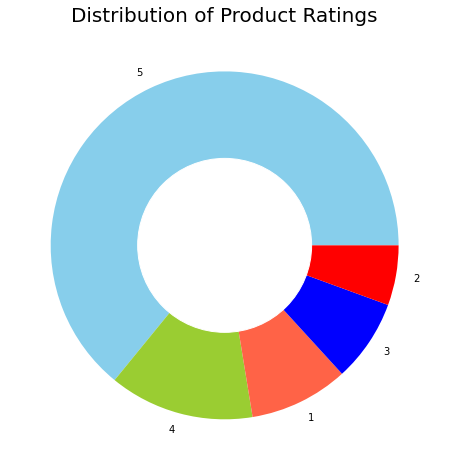

In [41]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

In [42]:
#sns.pairplot(data)

According to the figure above, more than half of people rated products they bought  with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

How to determine if a review is positive or negative?

We could use Score/Rating. A rating of 4 or 5 can be considered as a positive review. A rating of 1 or 2 can be considered as a negative one. A review of rating 3 is considered neutral 

In [43]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [45]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
